#### Kontrol Automatikoa. Maiatzeko deialdia

##### 2. problema

Kontrol sistema batean, kontrol diskretua ezartzen da, planta eta berrelikadura izanik:

$G_{p}(s)=\frac{2.6(s+10)(s+0.15)}{s(s^{2}+0.8s+1)(s+20)}\quad\text{eta}\quad H(s)=1$

Maila sarreraren aurrean bete beharreko espezifikazioak dira:

• Egonkorreko errorea $e_{ss}\leq\%2$

• Gaindiketa $\leq\%10$

• Abiadura: banda zabalera egokia lortzeko sistemaren irabazi kritikoko maiztasuna izan behar da $\geq0.7Hz$

Hau da eskatzen dena:

(a) Maiztasun eremuko teknikak erabiliz diseinatu kontrolagailu egoki bat (diskretua). 

(b) Aztertu lortutako diseinua eta egokia ote den eztabaidatu.

#### Ebazpena

Lehengo sartu datuak

In [2]:
s=%s;z=%z;

g=2.6*(s + 10)*(s + 0.15)/s/(s^2 + 0.8*s + 1)/(s + 20);g.dt='c'

// errorea
ess=0.02

// Fase margina

FM=60

// Abiadura

wik=0.7 *2*%pi // rad/s

 g  = 
     3.9 +26.39s +2.6s^2     
   ------------------------  
   20s +17s^2 +20.8s^3 +s^4  
 ess  = 
   0.02
 FM  = 
   60.
 wik  = 
   4.3982297


Normalean K doitzen dugu errorea finkatzeko. Baina hau da 1 motako sistema eta maila sarrreraren aurrean errorea nulua da! Beraz, askatasuna daukagu lortzeko errorea.

Baina abiadura aldetik askatzen da banda zabnalera minimo bat 0.7 Hz. Horregatik aukeratu ahal da irabazi kritiko maiztasuna balio hori gaindituta. Erabili dezakegu irabazia emaitza lortzeko.

Bode diagrama egin behar da eta K balio bat finkatu

Adibidez

 K  = 
   14.125375


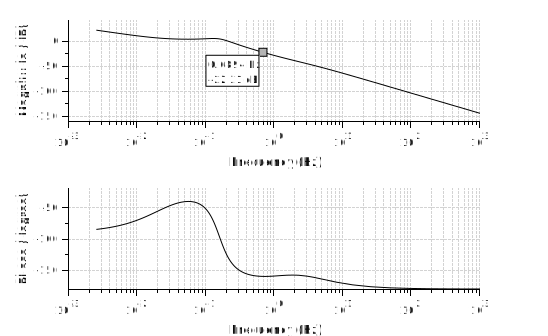

In [13]:
%plot inline //native
scf(1);
bode(g)
K=10^(23/20)

Igoz K 23 db, lortuko da nahi den banda zabalera. Orain aztertu dezakegu FM eta egonkortasun . Baina lehenago diskretizatuko dugu planta, inplementazioa diskretizazioa izango delako

 Ts  = 
   0.05
 gz  = 
      0.0014137 -0.002076z -0.0021113z^2 +0.0027888z^3     
   ------------------------------------------------------  
   0.3534547 -2.0346769z +4.0074409z^2 -3.3262187z^3 +z^4  

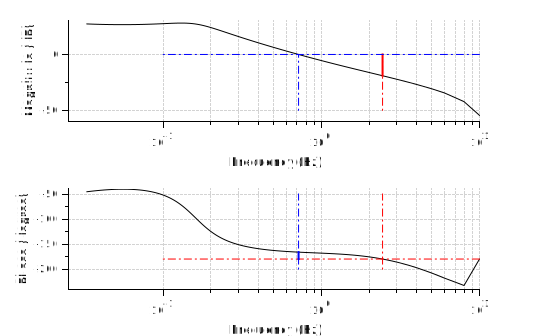

In [24]:
%plot inline //native
// BZ minimoa 0.7, 1 Hz egingo dut, kontutan izateko gero diseinatuko dugun sarea

Ts=1/(1.0*20)
gz=ss2tf(dscr(g,Ts))

show_margins(K*gz)

Ikusten da FM txikia dela. Sare bat behar dut. Atzerapena izan da erabili, BZ txiktzen delako, beraz, aurrerapen sarea, diseinatuko dut, FM lortzeko (46º eravbiliko dut). Igotzen da irabazi kritikoko maiztasuna 1.2 Hzetara

Tustineko transfrormatua bilineala erabiltzen  da (horner funtzioaren bitartez).

$s=\frac2{T_s}\frac{z-1}{z+1}$

 pha  = 
   0.8028515
 b  = 
   6.1260549

   7.8718089
 wik  = 
   7.5398224
 Tb  = 
   0.0535856
 sareb  = 
   1 +0.3282686s  
   -------------  
   1 +0.0535856s  
 sarebz  = 
   -3.8590839 +4.4953325z  
   ----------------------  
       -0.3637515 +z       

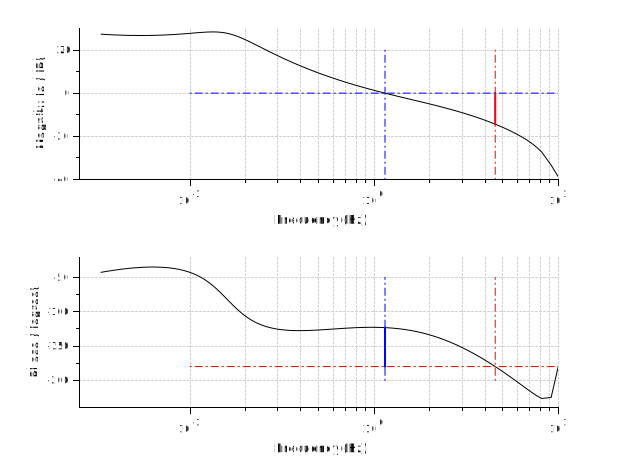

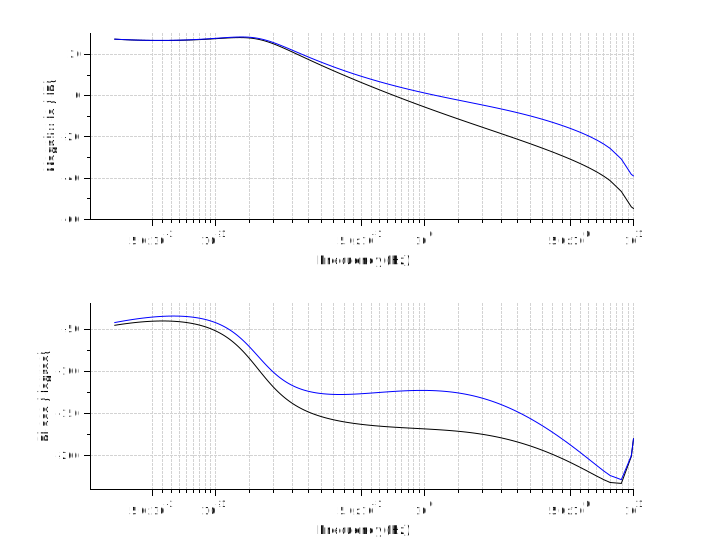

In [26]:
%plot inline //native
pha=46*%pi/180
b=(1+sin(pha))/(1-sin(pha))

disp(10*log10(b))

wik=1.2*2*%pi

Tb=1/sqrt(b)/wik
sareb=(1+b*Tb*s)/(1+Tb*s)
sarebz=horner(sareb,2/Ts*(z-1)/(z+1))
scf(2);clf()
show_margins(K*sarebz*gz)

scf(1);clf()
bode([K*gz;K*sarebz*gz])

Lortzen den FM da 57º, gutxi gorabehera.

Denbora eremuko erantzuna aztertzen da (ireteera eta kontrol seinalea).

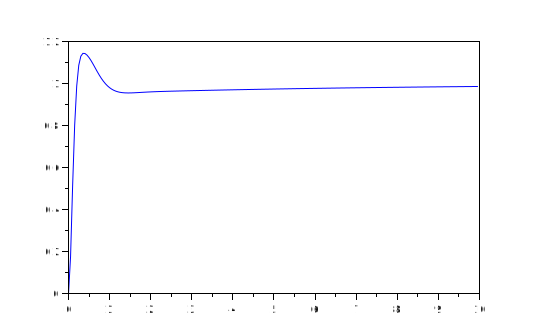

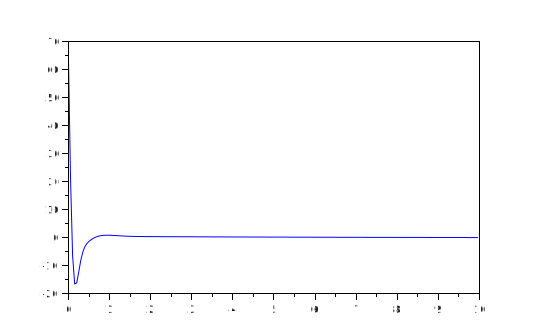

In [29]:
%plot inline
r=ones(1,200);

gitxiaz=(K*sarebz*gz)/.(1);

uitxiaz=(K*sarebz)/.(gz);
tz=(0:199)*Ts;
yz=dsimul(tf2ss(gitxiaz),r);
uz=dsimul(tf2ss(uitxiaz),r);
scf(4);clf()
plot(tz,yz)

scf(5);clf()
plot(tz,uz)


Gaindiketa nahi dena baino pixka bat altuagoa da. 

Kontrol seinale ez handia ez txikia da (problemaren natura fisikoa jakin gabe, noski). Zeozer esatekotan, agian saturazioakin arazoak egon daitezke, baina balioak ez dira handiak ere ez.

Begiratzen bada EK, bakarrik irabazia aldatuz gutxi egin daiteke sistema honetan, espezifikazioak hobetzeko.

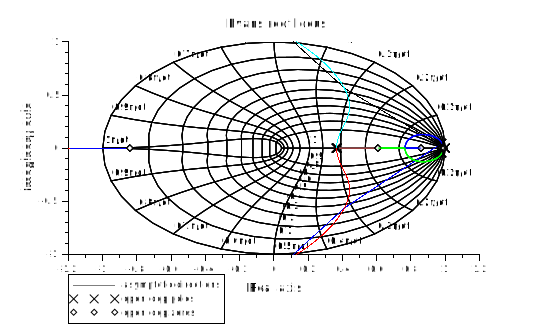

In [94]:
%plot inline //native
scf(100);
evans(K*sarebz*gz,50)
replot([-1,-0.5,1.2,0.5])
zgrid()
